In [115]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from itertools import combinations 

# import warnings
# warnings.filterwarnings('ignore')

In [119]:
# Adjustment function

def daisy_adj(df, current_index, reporting_node, comparison_node, r=2):
    
    reporting_node_val = df.loc[current_index,str(reporting_node)]    
    comparison_node_val = df.loc[current_index,str(comparison_node)]
    
    dif = reporting_node_val-comparison_node_val
    return dif/r  

def no_adj(df, current_index, reporting_node, comparison_node, r=2):
    return 0


def local_increment(macrotick_length=10000,error_tolerance=.001):
    error = np.random.uniform(-1, 1) * error_tolerance * macrotick_length
    return macrotick_length + error



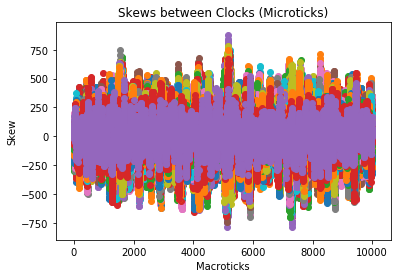

In [159]:
clock_sync_sim(adjustment_func=daisy_adj,clock_freq = 40*(10**6), timeslot_length = 10**-3,node_count=10, sim_length=10000, r=2.41);

In [160]:
40*(10**6) * (10**-3) * .001

40.0

In [155]:
def sim_plot(df, node_count):
    for n0, n1 in combinations(range(node_count),2):
        plt.scatter(df.index, df[str(n0)]-df[str(n1)]);

    plt.xlabel('Macroticks')
    plt.ylabel('Skew')
    plt.title('Skews between Clocks (Microticks)')


def clock_sync_sim(error_tolerance=.001, adjustment_func=daisy_adj, clock_freq = 40*(10**6), timeslot_length = 10**-3, node_count=4, sim_length=40, r=2):
    
    macrotick_length = clock_freq * timeslot_length
    
    df = pd.DataFrame(index=range(sim_length), columns=['Counter','Node Reporting']+[str(node) for node in range(node_count)])
    df.Counter=df.index*macrotick_length
    
    df['Node Reporting'] = df.index%node_count
    
    nodes_ref = list(range(node_count))
    nodes_ref.insert(0, nodes_ref.pop())
    
    for i in df.index:
        reporting_node = df.loc[i,'Node Reporting']
        comparison_node = nodes_ref[reporting_node]
        
        for j in range(node_count):
            if i == 0:
                df.loc[i,str(j)] = 0
            else: 
                prev_time = df.loc[i-1,str(j)]
                df.loc[i,str(j)] = prev_time + local_increment(macrotick_length,error_tolerance)
                
        df.loc[i,str(comparison_node)] = df.loc[i,str(comparison_node)] + adjustment_func(df, i, reporting_node, comparison_node, r)
                
    sim_plot(df, node_count)
    return df
    

    




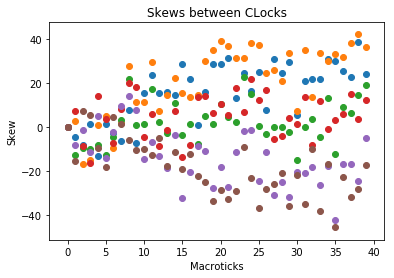

In [104]:
clock_sync_sim(adjustment_func=daisy_adj_old);

In [78]:
# for i in df.index:
#     for j in range(4):
#         if i == 0:
#             df.loc[i,str(j)] = 0
#         else: 
#             df.loc[i,str(j)] = time_adjust(current_index = i, node = j)
# # print(df)


# sim_plot(df, node_count=4)


# plt.plot(df.index,df.Counter-df.Counter)
# plt.scatter(df.index, df['0']-df.Counter);
# plt.scatter(df.index, df['1']-df.Counter);
# plt.scatter(df.index, df['2']-df.Counter);
# plt.scatter(df.index, df['3']-df.Counter);

# plt.xlabel('Macroticks (10,000 Microticks)')
# plt.ylabel('Error')
# plt.title('X')

0.0
0.0
0.0
0.0
1.41381137136
-1.48805478158
7.71521740632
-7.6409739961
10.4774372882
-10.0541647102
-4.48223330621
4.05896072824
3.48601217533
-7.54642598565
-0.997681659173
5.0580954695
6.14999671656
-6.11482844219
-1.28829316123
1.25312488685
-1.93011291536
3.41383257123
1.53165807388
-3.01537772975
-8.47467667385
-6.92206888178
16.6515564978
-1.25481094222
-3.4538000733
-6.11775372749
14.1207056242
-4.5491518234
-2.00452225645
-0.778589447902
3.37445516704
-0.5913434627
-0.0970779609343
-0.651345241757
5.24938506926
-4.50096186658
8.95514436843
6.59062821379
-4.08550251189
-11.4602700703
5.68916783281
-4.51452063225
10.7293618891
-11.9040090897
13.3974612026
-4.04265620848
-5.56746049548
-3.78734449868
-1.51754122236
-1.17393537151
-0.274532169482
2.96600876332
3.55154285851
-4.2400834435
-7.52624553896
8.21478612392
-2.36999420851
-4.37690473319
3.21696358093
3.5299353608
8.67471818041
-7.93650396864
5.58636801853
-6.32458223024
4.87383167402
-0.681827495311
10.0176475005
-14.209

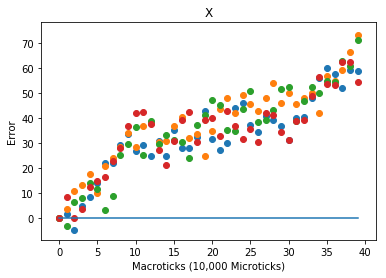

In [35]:
def global_avg_adj(current_index, node):
    nodes = [0,1,2,3]
    nodes.remove(node)
    node_vals = [df[str(n)][current_index-1] for n in nodes]
    avg = np.average(node_vals)
    prev_time = df[str(node)][current_index-1]
    dif = avg - prev_time
    print(dif)
    return dif/2     

for i in df.index:
    for j in range(4):
        if i == 0:
            df[str(j)][i] = 0
        else: 
            df[str(j)][i] = time_adjust(current_index = i, node = j, adjustment_func=global_avg_adj)
            
plt.plot(df.index,df.Counter-df.Counter)
plt.scatter(df.index, df['0']-df.Counter);
plt.scatter(df.index, df['1']-df.Counter);
plt.scatter(df.index, df['2']-df.Counter);
plt.scatter(df.index, df['3']-df.Counter);

plt.xlabel('Macroticks (10,000 Microticks)')
plt.ylabel('Error')
plt.title('X')

0
0
0
0
5.120934315478735
7.532577508480244
-4.2660491163078404
-8.387462707651139
-8.802301401767181
14.721880532215437
4.957444753054006
-10.877023883502261
-16.934711707173847
4.735092089351383
13.471314167116361
-1.2716945492938976
-8.609160857187817
-3.1137736383388983
19.766160959552508
-8.043226464025793
-4.514918890163244
-13.218640601415245
7.8082188042244525
9.925340687354037
3.012749052933941
-19.623617947887396
9.083234665835334
7.527634229118121
8.829838136167382
-6.1229474505234975
-18.260282614675816
15.553391929031932
21.9809634827252
4.5863965573807945
-24.580910537551972
-1.9864495025540236
9.886434359767009
15.858419663854875
-2.900476691153017
-22.844377332468866
9.143150011877879
14.780579106096411
-9.879233028754243
-14.044496089220047
-13.19217355363071
16.80476485856343
2.1648328898882028
-5.777424194820924
8.652935202830122
-11.120724828870152
9.27735434488568
-6.80956471884565
8.587352070549969
-15.228755345902755
-2.0288229792931816
8.670226254645968
2.071261

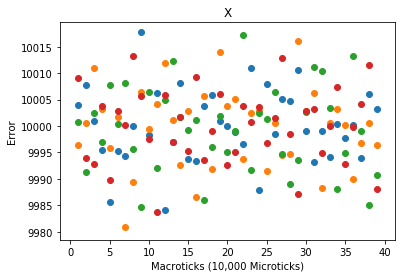

In [53]:
def daisy_adj(current_index, node):
    nodes = [3,0,1,2]
    n = nodes[node]
    prev_time = df[str(node)][current_index-1]
    dif = df[str(n)][current_index-1] - prev_time
    print(dif)
    return dif/2     

for i in df.index:
    for j in range(4):
        if i == 0:
            df[str(j)][i] = 0
        else: 
            df[str(j)][i] = time_adjust(current_index = i, node = j, adjustment_func=daisy_adj)
            
# plt.plot(df.index,df.Counter-df.Counter)
plt.scatter(df.index, df['0']-df['0'].shift(1));
plt.scatter(df.index, df['1']-df['1'].shift(1));
plt.scatter(df.index, df['2']-df['2'].shift(1));
plt.scatter(df.index, df['3']-df['3'].shift(1));

plt.xlabel('Macroticks (10,000 Microticks)')
plt.ylabel('Error')
plt.title('X')

In [50]:
index = range(40)
# df = pd.DataFrame(index=index, columns=['Counter','Node Reporting','0','1','2','3'])

df = pd.DataFrame(index=index, columns=['Counter','0','1','2','3'])
df.Counter=df.index*10000
# df['Node Reporting'] = df.index%4


In [48]:
df['0']-df['0'].shift(1).replace(np.nan, 0)

0           0
1     9993.33
2     10009.9
3     9997.94
4      9986.4
5       10001
6     10000.8
7     10003.6
8      9995.9
9     10004.4
10    9997.51
11    10006.6
12    10005.1
13    9990.66
14    9994.05
15    10006.2
16    10009.7
17    9988.72
18    10002.4
19    9995.49
20    9991.94
21    9997.74
22    9995.47
23    10001.7
24    10002.9
25    10006.4
26    10005.6
27     9996.2
28    10000.1
29    9996.68
30     9987.4
31    9999.27
32    9994.51
33     9998.6
34    9997.14
35    10004.7
36    9996.02
37    10003.9
38    9998.17
39    10001.6
Name: 0, dtype: object

In [113]:
# Adjustment functions

def global_avg_adj(current_index, node, node_count,r=2):
    nodes = list(range(node_count))
    nodes.remove(node)
    node_vals = [df[str(n)][current_index-1] for n in nodes]
    avg = np.average(node_vals)
    prev_time = df[str(node)][current_index-1]
    dif = avg - prev_time
    return dif/r

def daisy_adj_old(current_index, node,node_count, r=2):
    
    nodes_ref = list(range(node_count))
    nodes_ref.insert(0, nodes_ref.pop())
    comparison_node = nodes_ref[node]
    
    prev_time = df[str(node)][current_index-1]
    dif = df[str(comparison_node)][current_index-1] - prev_time
    return dif/r


def daisy_adj(current_index, node, node_count, r=2):
    
    nodes_ref = list(range(node_count))
    nodes_ref.insert(0, nodes_ref.pop())
    comparison_node = nodes_ref[node]
    
    if node == 0:
        comparison_node_val = df[str(comparison_node)][current_index-1]
    else:
        comparison_node_val = df[str(comparison_node)][current_index]
        
    
    prev_time = df[str(node)][current_index-1]
    print(current_index, node, prev_time, comparison_node_val)
    
    dif = comparison_node_val - prev_time
#     print(dif)
    return dif/r  


def no_adj(current_index, node, node_count, r):
    return 0

def time_adjust(current_index, node, node_count, r=2, error_tolerance=.001, adjustment_func=no_adj, macrotick_length=10000):
    error = np.random.uniform(-1, 1) * error_tolerance * macrotick_length
    prev_time = df[str(node)][current_index-1]
    local_time = prev_time + adjustment_func(current_index, node, node_count, r) + macrotick_length + error
    return local_time




def local_increment(macrotick_length=10000,error_tolerance=.001):
    error = np.random.uniform(-1, 1) * error_tolerance * macrotick_length
    return macrotick_length + error

